In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import models,layers

2024-02-29 06:10:27.328953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 06:10:27.329062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 06:10:27.512014: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
test.shape

(28000, 784)

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = train['label']
y = y.to_numpy()

In [7]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
new_train = train.drop("label",inplace = True,axis=1)

In [9]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


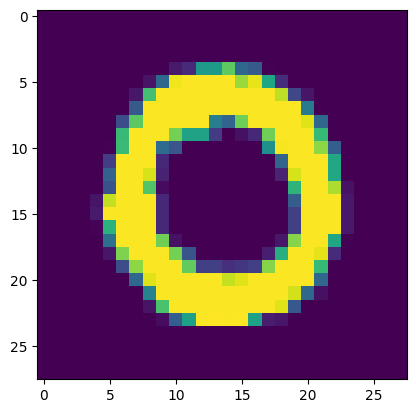

In [10]:
sample = np.reshape(train.iloc[1,:].values,(28,28))
plt.imshow(sample)

In [11]:
X = train.values.reshape((len(train), 28, 28))
X_test =test.values.reshape(len(test), 28, 28)

X = X / 255.0
X_test = X_test / 255.0

# Previous expand dim
print(X.shape)
print(X_test.shape)

# Expand dim
X = np.expand_dims(X, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# After expand dim
print(X.shape)
print(X_test.shape)

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(f"No of data train: {X_train.shape[0]}")
print(f"No of data val: {X_val.shape[0]}")
print(f"No of data test: {X_test.shape[0]}")

(42000, 28, 28)
(28000, 28, 28)
(42000, 28, 28, 1)
(28000, 28, 28, 1)
No of data train: 37800
No of data val: 4200
No of data test: 28000


In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

print(type(X_train))
print(type(y_train))

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800,)
(4200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),
        
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    
    layers.Dense(10,activation='softmax')
])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [15]:
model.compile(optimizer='adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['acc']
             )

In [16]:
callbacks = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_acc", factor=0.5, patience=5, min_lr=1e-3)

In [17]:
history = model.fit(X_train,y_train,validation_data = (X_val, y_val), epochs=20, callbacks=[callbacks])

Epoch 1/20


2024-02-29 06:10:50.795254: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1709187054.080553      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1182/1182 [==============================] - 14s 6ms/step - loss: 0.3311 - acc: 0.8902 - val_loss: 0.0794 - val_acc: 0.9774 - lr: 0.0010
Epoch 2/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0989 - acc: 0.9704 - val_loss: 0.0481 - val_acc: 0.9879 - lr: 0.0010
Epoch 3/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0767 - acc: 0.9783 - val_loss: 0.0492 - val_acc: 0.9852 - lr: 0.0010
Epoch 4/20
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0667 - acc: 0.9804 - val_loss: 0.0386 - val_acc: 0.9900 - lr: 0.0010
Epoch 5/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0617 - acc: 0.9821 - val_loss: 0.0374 - val_acc: 0.9895 - lr: 0.0010
Epoch 6/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0546 - acc: 0.9844 - val_loss: 0.0385 - val_acc: 0.9876 - lr: 0.0010
Epoch 7/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0474 - acc: 0.9862 - val_loss: 0.0445 - val_acc: 0

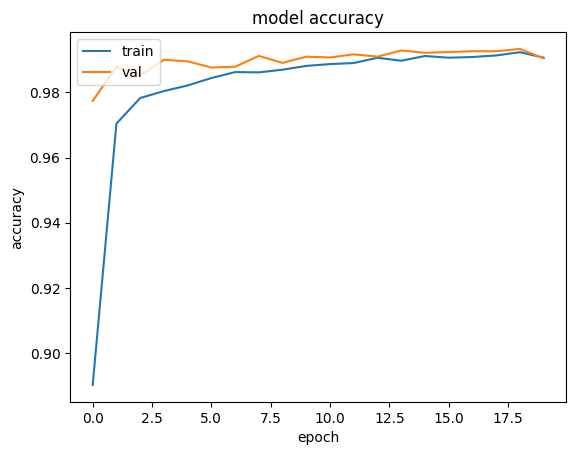

<function matplotlib.pyplot.show(close=None, block=None)>

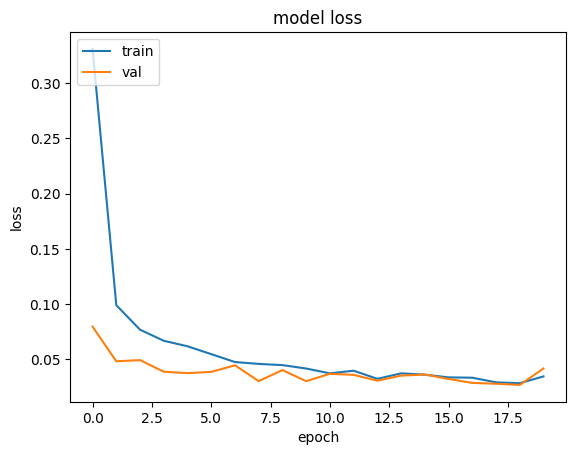

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

In [19]:
prediction = model.predict(X_train)

preds = np.argmax(prediction, axis=1)

print(preds)

1182/1182 [==============================] - 2s 2ms/step
[8 5 6 ... 2 6 0]


predicted label: [0]


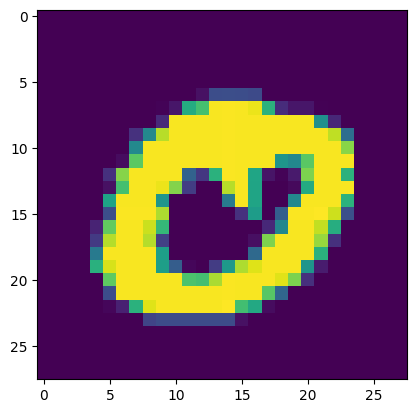

In [20]:

first_image = (X_train[75])
# first_label = y[775]
# # print(first_image)
# # print(first_label)
# print("First image to Predict")
plt.imshow(first_image)
# print('actual label:',[first_label])
    
print("predicted label:",[np.argmax(prediction[75])])

In [21]:
import pickle

In [22]:
pickle.dump(model,open('model.pkl','wb'))